In [15]:
%matplotlib inline
def angle_diff(x):
    if x <= 180:
        return x 
    else:
        return 360-180
    
import pandas as pd
results = pd.read_csv('./results_p1.csv') \
              .append(pd.read_csv('./results_p2.csv')) \
              .append(pd.read_csv('./results_p3.csv')) \
              .append(pd.read_csv('./results_p4.csv'))
results.shape[0]

141696

In [16]:
################################
### Expected rows in results ###
################################

# nb_days * nb_hours * 48 + 48 for the last hour in test range
7*24*48

8064

In [17]:
################################################################
### Expected rows where we can compare with numtech forecast ###
################################################################

# speed (same outcome for wind_dir below)
results['present_hour'] = results.present_time.map(lambda x : int(x[11:13]))
r = results.groupby(['present_hour'])[['pred_speed','numtech_speed']].count().reset_index()

### Expected % of rows 
def present_hour_ratio(x):
    if x in range(8,20):
        return (48 - (x + 1)) / 48 
    if x in range (0,8):
        return (48 - (x +12 + 1)) / 48 
    if x in range(20,24):
        return (48 - (x - 12 + 1)) / 48 
    

r['expected_ratio'] = r.present_hour.map(present_hour_ratio)
r['real_ratio'] = r['numtech_speed'] / r['pred_speed']

display(r)

,present_hour,pred_speed,numtech_speed,expected_ratio,real_ratio
0,0,5904,4305,0.729167,0.729167
1,1,5904,4182,0.708333,0.708333
2,2,5904,4059,0.687500,0.687500
3,3,5904,3936,0.666667,0.666667
4,4,5904,3813,0.645833,0.645833
5,5,5904,3690,0.625000,0.625000
6,6,5904,3567,0.604167,0.604167
7,7,5904,3444,0.583333,0.583333
8,8,5904,4785,0.812500,0.810467
9,9,5904,4662,0.791667,0.789634


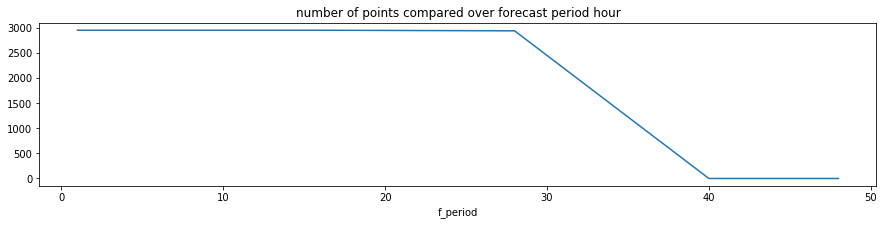

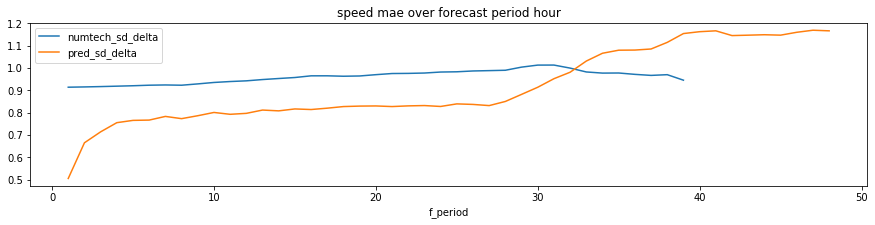

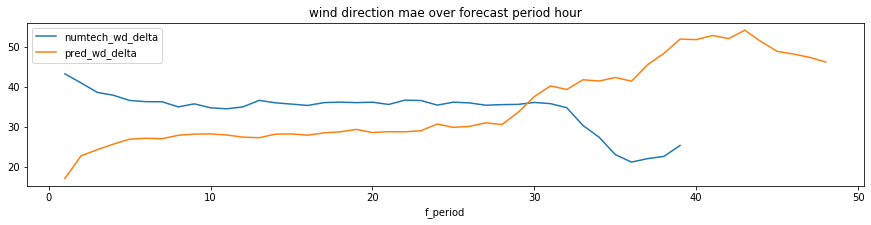

In [19]:
# number of points compared
(results.groupby('f_period')['numtech_speed'].count()).plot(figsize=(15,3),
                                                            title='number of points compared over forecast period hour')

results['pred_sd_delta'] = (results['pred_speed'] - results['real_speed']).abs()
results['numtech_sd_delta'] = (results['numtech_speed'] - results['real_speed']).abs()

results.dropna().groupby('f_period')['numtech_sd_delta'].mean().reset_index() \
.merge(results.groupby('f_period')['pred_sd_delta'].mean().reset_index(),how='outer').set_index('f_period') \
.plot(figsize=(15,3),title='speed mae over forecast period hour')

results['pred_wd_delta'] = (results['pred_wind_dir'] - results['real_wind_dir']) \
                            .abs().map(angle_diff)
results['numtech_wd_delta'] = (results['pred_wind_dir'] - results['numtech_wind_dir']) \
                            .abs().map(angle_diff)
    
results.dropna().groupby('f_period')['numtech_wd_delta'].mean().reset_index() \
.merge(results.groupby('f_period')['pred_wd_delta'].mean().reset_index(),how='outer').set_index('f_period')\
.plot(figsize=(15,3),title='wind direction mae over forecast period hour')